### Initialisierung




In [1]:
%matplotlib notebook
from sympy import *
import matplotlib.pyplot as plt

## Driving-point impedances

In [46]:
Y1,Y3,Y5,Y6, Z1,Z3,Z5,Z6 = symbols('Y1,Y3,Y5,Y6,Z1,Z3,Z5,Z6')
eqdpi = [
    (Z1, 1/Y1),
    (Z3, 1/Y3),
    (Z5, 1/Y5),
    (Z6, 1/Y6)
]
eqdpi

[(Z1, 1/Y1), (Z3, 1/Y3), (Z5, 1/Y5), (Z6, 1/Y6)]

In [47]:
G,G1,YL = symbols('G,G1,YL')
eqdpa = [
    (Y1, 2*G),
    (Y3, 2*G1),
    (Y5, 2*G+YL),
    (Y6, 2*G1)
]
eqdpa

[(Y1, 2*G), (Y3, 2*G1), (Y5, 2*G + YL), (Y6, 2*G1)]

## Loops und Graphdeterminante

In [82]:
L1,L2,L3,L4,L5,L6,A = symbols('L1,L2,L3,L4,L5,L6,A')
eqloops = [
    (L1, A*G*Z5),
    (L2, -A*G1*Z3),
    (L3, -A*G1*Z6),
    (L4, A*G*Z1),
    (L5, -A**2*G*Z1*G1*Z3*G*Z5),
    (L6, G*Z1*G*Z5)
]
eqloops

[(L1, A*G*Z5),
 (L2, -A*G1*Z3),
 (L3, -A*G1*Z6),
 (L4, A*G*Z1),
 (L5, -A**2*G**2*G1*Z1*Z3*Z5),
 (L6, G**2*Z1*Z5)]

In [83]:
deltaG = 1- (L1+L2+L3+L4+L5+L6) + (L1*L3+L1*L4 + L2*L3+L2*L4+L2*L6 + L3*L6) - (L2*L3*L6)
deltaG

L1*L3 + L1*L4 - L1 - L2*L3*L6 + L2*L3 + L2*L4 + L2*L6 - L2 + L3*L6 - L3 - L4 - L5 - L6 + 1

In [85]:
expDenom = (( deltaG.subs(eqloops).subs(eqdpi) ) * Y1*Y3*Y5*Y6 ).simplify().subs(eqdpa).simplify()
expDenom

G*G1**2*(A**2*G - 4*A*G + 4*A*YL + 12*G + 8*YL)

## Vorwärtspfade, Zähler der Eigenimpedanz

In [62]:
P1,D1 = symbols('P1,D1')
eqpaths = [
    (P1, 1*Z1),
    (D1, 1- (L1+L2+L3) + (L1*L3 + L2*L3))
]
eqpaths

[(P1, Z1), (D1, L1*L3 - L1 + L2*L3 - L2 - L3 + 1)]

In [67]:
expNumer = ( P1*D1 * Y1*Y3*Y5*Y6 ).subs(eqpaths).subs(eqloops).subs(eqdpi).simplify().subs(eqdpa).simplify()
expNumer

G1**2*(A**2*YL + 4*A*G + 4*A*YL + 8*G + 4*YL)

In [68]:
Zin = expNumer/expDenom
Zin

(A**2*YL + 4*A*G + 4*A*YL + 8*G + 4*YL)/(G*(A**2*G - 4*A*G + 4*A*YL + 12*G + 8*YL))

In [70]:
Zin.limit(A, oo)

YL/G**2

## Nichtidealer OpAmp

In [71]:
w1,s = symbols('w1,s')
eqgain = [
    (A, w1/s)
]
eqgain

[(A, w1/s)]

In [73]:
( expDenom.subs(eqgain ) * s**2).simplify()

G*G1**2*(G*w1**2 + s**2*(12*G + 8*YL) + 4*s*w1*(-G + YL))

In [75]:
C = symbols('C')
eqYL = [(YL, s*C)]
eqYL

[(YL, C*s)]

In [78]:
expDenomYL = (expDenom.subs(eqgain)*s**2).simplify().subs(eqYL)
expDenomYL

G*G1**2*(G*w1**2 + s**2*(8*C*s + 12*G) + 4*s*w1*(C*s - G))

In [79]:
expNumerYL = (expNumer.subs(eqgain)*s**2).simplify().subs(eqYL)
expNumerYL

G1**2*(C*s*w1**2 + 4*s**2*(C*s + 2*G) + 4*s*w1*(C*s + G))

In [88]:
ZinYL = (expNumerYL/expDenomYL).simplify()
ZinYL

s*(C*w1**2 + 4*s*(C*s + 2*G) + 4*w1*(C*s + G))/(G*(G*w1**2 + 4*s**2*(2*C*s + 3*G) + 4*s*w1*(C*s - G)))

## Genauer Angeschaut...

In [93]:
eqValues = [
    (G, 1/1000.0),
    (w1, 2.0*pi*100e6)
]
eqValues

[(G, 0.001), (w1, 200000000.0*pi)]

1 uH

In [95]:
eqCval = [
    (C, (G**2 * 1e-6).subs(eqValues))
]
eqCval

[(C, 1.00000000000000e-12)]

Ist eher zu klein (wegen parasitären C), also lieber 100uH

In [96]:
eqCval = [
    (C, (G**2 * 100e-6).subs(eqValues))
]
eqCval

[(C, 1.00000000000000e-10)]

In [107]:
ZinNumeric = N(ZinYL.subs(eqCval).subs(eqValues).simplify()).simplify()
ZinNumeric

1.0*s*(4.0e-7*s**2 + 259.327412287183*s + 41991691727.2293)/(8.0e-10*s**3 + 0.263327412287183*s**2 - 2513274.12287183*s + 394784176043574.0)

In [108]:
f,w = symbols('w,f')
eqwf = [
    (s, I*w)
]
eqwf

[(s, I*f)]

In [110]:
Amplitude = abs(ZinNumeric.subs(eqwf))
Amplitude

1.0*Abs(f*(-4.0e-7*f**2 + 259.327412287183*I*f + 41991691727.2293)/(8.0e-10*I*f**3 + 0.263327412287183*f**2 + 2513274.12287183*I*f - 394784176043574.0))

<IPython.core.display.Javascript object>


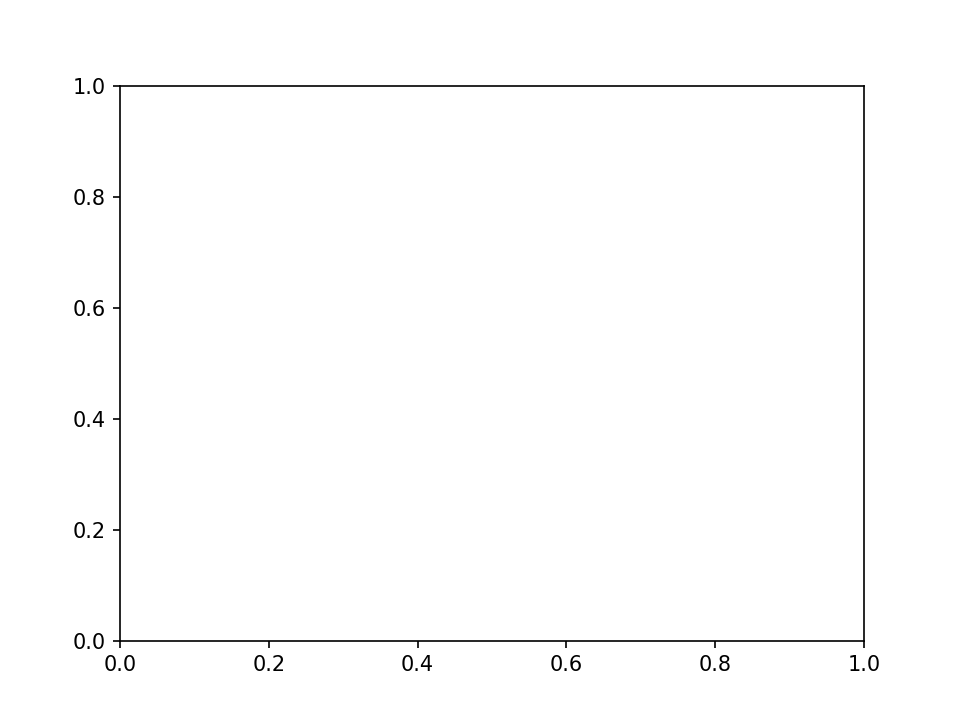

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

In [124]:
plt.plot(Amplitude, (w,2*pi*10*1e3,2*pi*10*100e6), xscale='log', yscale='log', adaptive=False)

ZinYL für tiefe Frequenzen

In [126]:
ZinYL

s*(C*w1**2 + 4*s*(C*s + 2*G) + 4*w1*(C*s + G))/(G*(G*w1**2 + 4*s**2*(2*C*s + 3*G) + 4*s*w1*(C*s - G)))

In [127]:
N,D = fraction(ZinYL)
N

s*(C*w1**2 + 4*s*(C*s + 2*G) + 4*w1*(C*s + G))

In [128]:
D

G*(G*w1**2 + 4*s**2*(2*C*s + 3*G) + 4*s*w1*(C*s - G))

In [132]:
Dcoeffs = poly(D,s).all_coeffs()
Dcoeffs

[8*C*G, 4*C*G*w1 + 12*G**2, -4*G**2*w1, G**2*w1**2]

In [133]:
Ncoeffs = poly(N,s).all_coeffs()
Ncoeffs

[4*C, 4*C*w1 + 8*G, C*w1**2 + 4*G*w1, 0]

In [135]:
ZinYLsimp = s*Ncoeffs[2] / Dcoeffs[3]
ZinYLsimp

s*(C*w1**2 + 4*G*w1)/(G**2*w1**2)